    напишіть функцію гіпотези лінійної регресії у векторному вигляді; Done
    створіть функцію для обчислення функції втрат у векторному вигляді; Done
    реалізуйте один крок градієнтного спуску; Done
    знайдіть найкращі параметри $\vec{w}$ для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень; Done
    
    знайдіть ці ж параметри за допомогою аналітичного рішення;Done
    порівняйте отримані результати.Done

    !не потрібно використовувати Стандартизацію, або Нормалізацію даних

In [3]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [4]:
csv_url = "https://drive.google.com/uc?id=1-rAa4XT4_fI0dOBlMNuE6a7jB0wln_Qo"

df = pd.read_csv(csv_url, header=0)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.shape

(545, 13)

In [6]:
df.tail(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


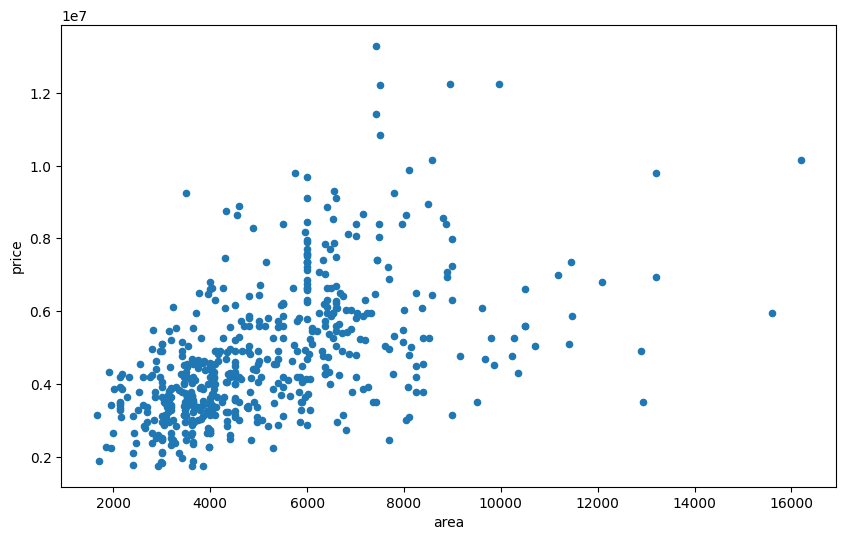

In [7]:
df.plot(x='area', y='price', kind='scatter', figsize =(10,6))
plt.show()

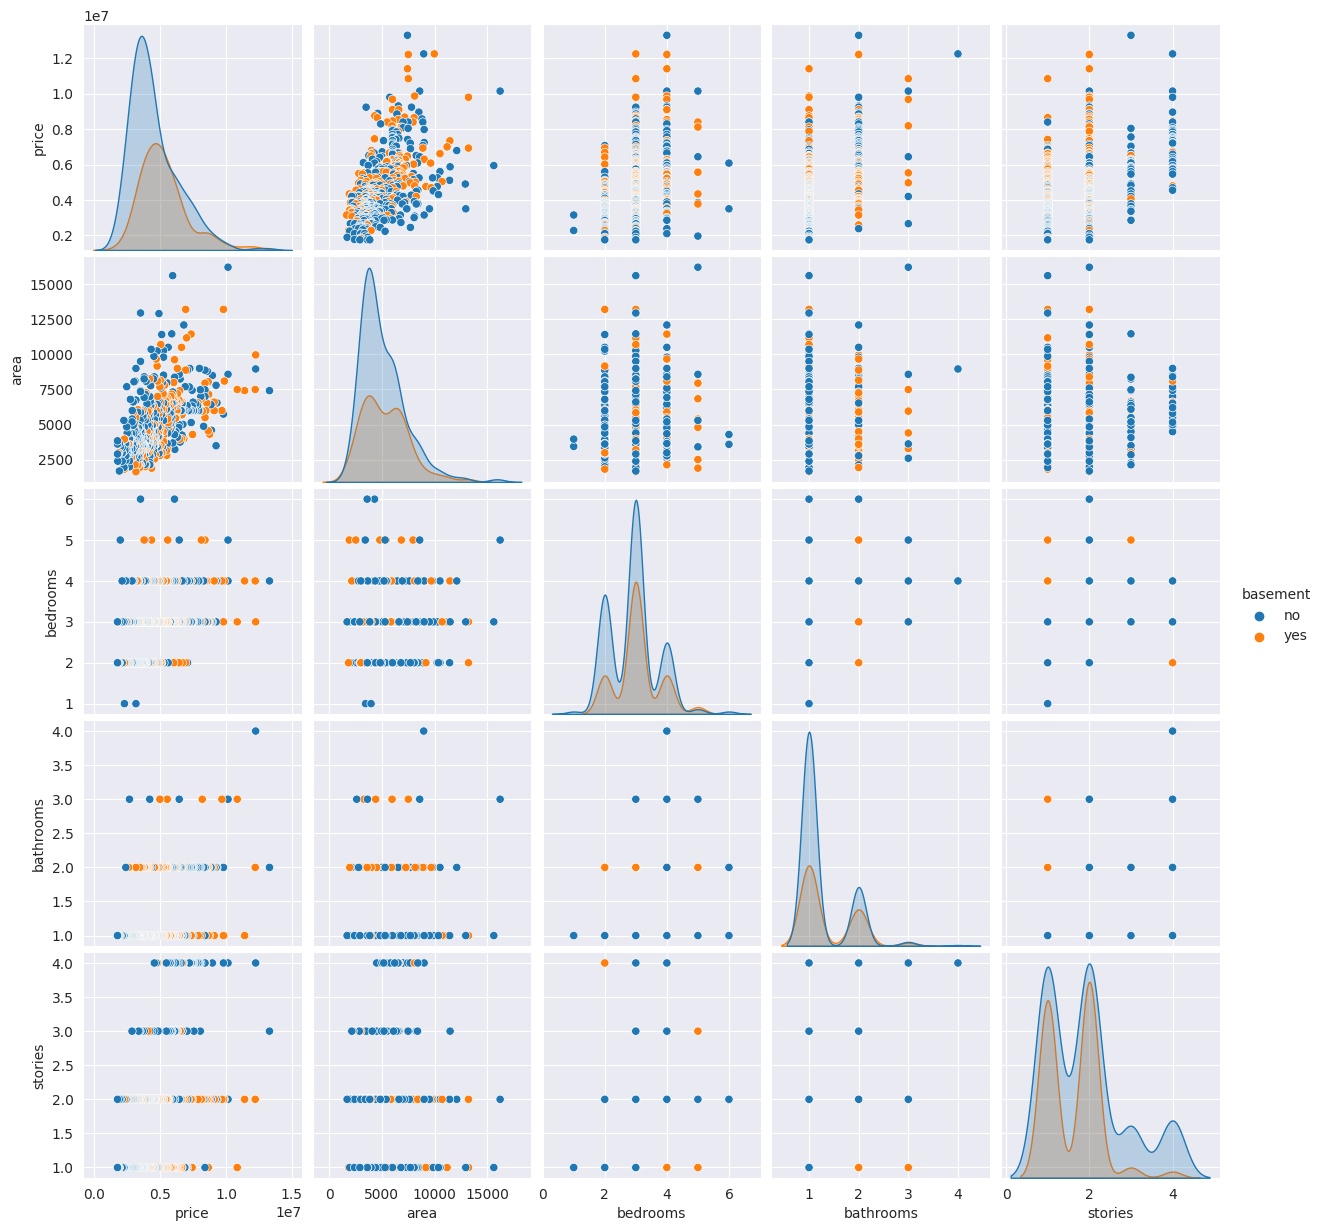

In [8]:
sns.set_style('darkgrid')
sns.pairplot(df,
             vars =['price','area','bedrooms','bathrooms','stories'],
             hue ='basement')
plt.show()

# Correlation Matrix

In [95]:
correlation_matrix = df.corr()
correlation_matrix

<ipython-input-95-f471181e404f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000


In [96]:
max_corr_pair = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(2)
print("Pair with the highest correlation:")
print(max_corr_pair)
print()
max_corr_pairs = correlation_matrix.abs().unstack().sort_values(ascending=False).drop_duplicates().head(4)
max_corr_pairs = max_corr_pairs.iloc[1:3]
print("Two pairs with the highest correlation:")
print(max_corr_pairs)


Pair with the highest correlation:
price  price    1.000000
area   price    0.535997
dtype: float64

Two pairs with the highest correlation:
area   price        0.535997
price  bathrooms    0.517545
dtype: float64


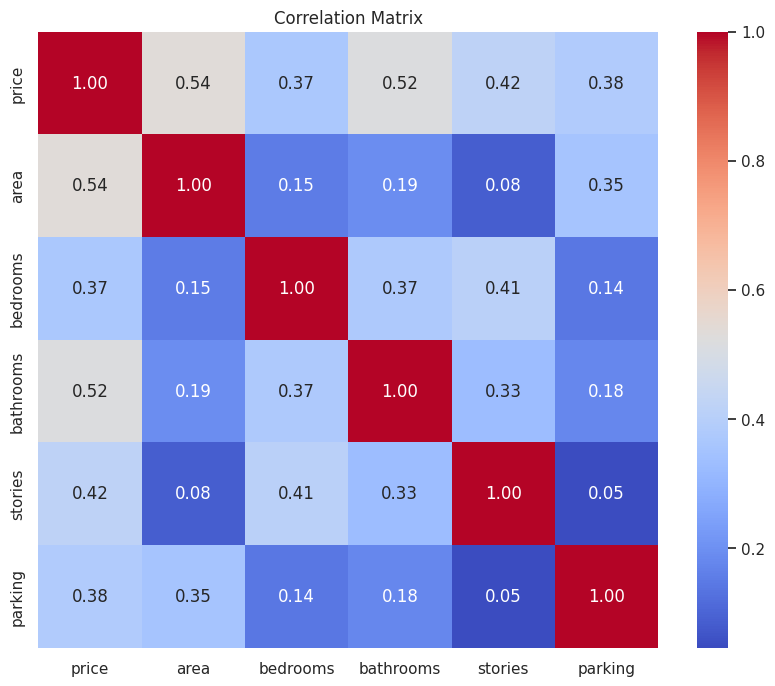

In [97]:
sns.set(style='white')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

ціна price |
площа area |
спалень bedrooms |
кількість поверхів stories |
ванних кімнат bathrooms |
коридор mainroad |
гостьова guestroom |
підвал basement |
гаряче водонагрівання hotwaterheating |
кондиціонер airconditioning |
парковка parking |
прибудинкова площа prefarea |
статус меблювання furnishingstatus

# Linear Regression

$$h(x)=w_0+w_1*x$$

In [98]:
def h(w_0, w_1, x):
  return w_0 + w_1*x

# Compute Loss function

In [99]:
def loss_function(w_0, w_1, df):
  n= df.area.shape[0]
  cost =0

  for x, y in zip (df.area, df.price):
    cost = cost + (h(w_0, w_1, x) - y )**2

  return cost/(2*n)

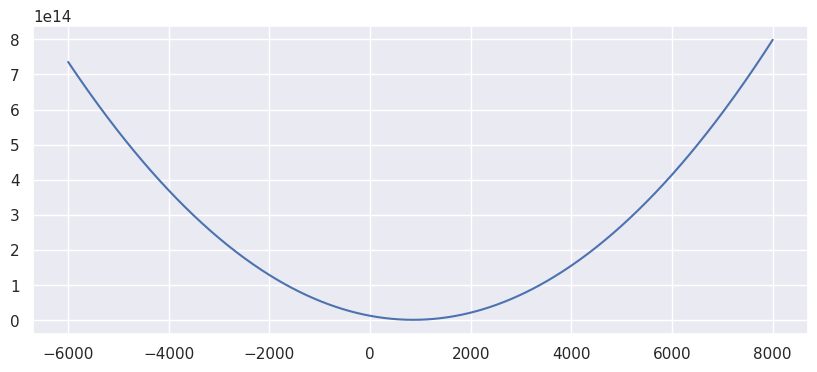

In [100]:
sns.set_style('darkgrid')
w_0 = 0

w_1 = np.linspace (-6000, 8000, 500)

plt.figure(figsize=(10,4))
plt.plot(w_1, [loss_function(w_0, w, df) for w in w_1])
plt.show()

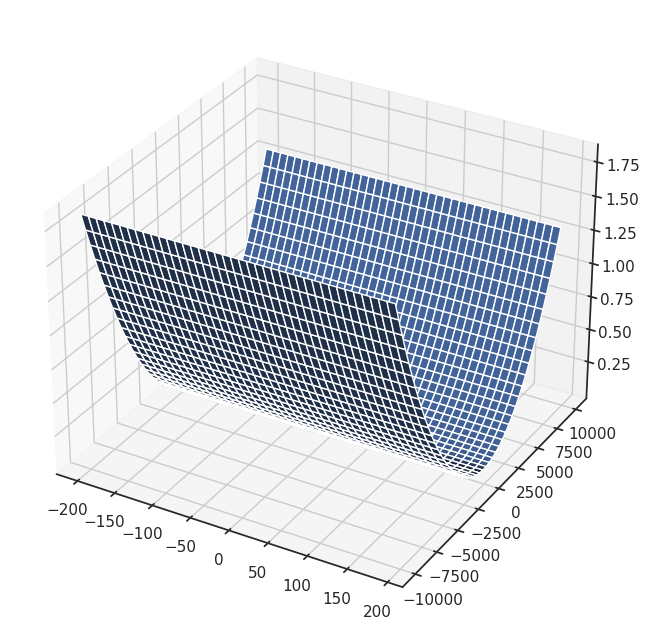

In [101]:
sns.set_style('white')
grid_w_0 =np.arange(-2e2, 2e2, 10)
grid_w_1 =np.arange(-10000, 10000, 20)

w_0, w_1 = np.meshgrid(grid_w_0, grid_w_1)

z= loss_function(w_0, w_1, df)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(w_0, w_1, z)
plt.show()

# Gradient Descent
area and price (test lecture)

In [102]:
def grad_step(weights, grads, learning_rate = 0.001):
  w_0, w_1 = weights
  grad_0, grad_1 = grads

  w_0 = w_0 - learning_rate*grad_0
  w_1 = w_1 - learning_rate*grad_1

  return w_0, w_1

In [103]:
def linear_hypothesis(w_0, w_1, x):
    return w_0 + w_1 * x

def grad_w_0(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (linear_hypothesis(w_0, w_1, x) - y)

    return cost / n

def grad_w_1(w_0, w_1, df):
    n = df.area.shape[0]
    cost = 0

    for x, y in zip(df.area, df.price):
        cost = cost + (linear_hypothesis(w_0, w_1, x) - y) * x

    return cost / n


from lecture. needed normalized

In [104]:
def grad_descent(weights, df, num_iter, learning_rate = 0.001, epsilon = 0.01):

  w_0, w_1 = weights
  loss=loss_function(w_0, w_1, df)
  loss_history = [loss]

  for i in range(num_iter):

    d_w_0 = grad_w_0(w_0, w_1, df)
    d_w_1 = grad_w_1(w_0, w_1, df)
    grads = (d_w_0, d_w_1)

    w_0, w_1 = grad_step(weights, grads, learning_rate = learning_rate)

    weights = (w_0, w_1)
    loss=loss_function(w_0, w_1, df)

    if abs(loss-loss_history[-1])<epsilon:
      loss_history.append(loss)
      break

    loss_history.append(loss)


  return weights, loss_history

In [105]:
weights, history = grad_descent((0., 0.), df, 10, learning_rate=0.000000001)


In [106]:
print("Найкращі ваги:", weights)
print("Значення функції втрат:", history)

Найкращі ваги: (0.04196223848831987, 232.63811313190448)
Значення функції втрат: [13106916364659.266, 12403952407579.826, 11744208535394.773, 11125027462876.484, 10543915281727.512, 9998531415733.91, 9486679193503.299, 9006297000815.238, 8555449976948.931, 8132322221542.448, 7735209480594.978]


In [107]:
def linear_hypothesis(w_0, w_1, x):
    return w_0 + w_1 * x
w_0_optimal, w_1_optimal = weights

def make_prediction(area):
    return linear_hypothesis(w_0_optimal, w_1_optimal, area)

area_new_data = 7420
prediction = make_prediction(area_new_data)

print(f"Прогноз ціни для площі {area_new_data}: {prediction}")

Прогноз ціни для площі 7420: 1726174.8414009698


# Gradient Descent
area, bathrooms, bedrooms, price

In [52]:
def grad_step(weights, grads, learning_rate=0.001):

    w_0, w_1, w_2, w_3 = weights
    grad_0, grad_1, grad_2, grad_3 = grads

    w_0 = w_0 - learning_rate * grad_0
    w_1 = w_1 - learning_rate * grad_1
    w_2 = w_2 - learning_rate * grad_2
    w_3 = w_3 - learning_rate * grad_3

    return w_0, w_1, w_2, w_3


In [53]:
def h(w_0, w_1, w_2, w_3, x1, x2, x3):
    return w_0 + w_1 * x1 + w_2 * x2 + w_3 * x3

def loss_function(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for x1, x2, x3, y in zip(df.area, df.bathrooms, df.bedrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) ** 2

    return cost / (2 * n)

def grad_w_0(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for x1, x2, x3, y in zip(df.area, df.bathrooms, df.bedrooms, df.price):
        cost += h(w_0, w_1, w_2, w_3, x1, x2, x3) - y

    return cost / n

def grad_w_1(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for x1, x2, x3, y in zip(df.area, df.bathrooms, df.bedrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x1

    return cost / n

def grad_w_2(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for x1, x2, x3, y in zip(df.area, df.bathrooms, df.bedrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x2

    return cost / n

def grad_w_3(w_0, w_1, w_2, w_3, df):
    n = df.area.shape[0]
    cost = 0

    for x1, x2, x3, y in zip(df.area, df.bathrooms, df.bedrooms, df.price):
        cost += (h(w_0, w_1, w_2, w_3, x1, x2, x3) - y) * x3

    return cost / n


In [54]:
def grad_descent(weights, df, num_iter, learning_rate=0.001, epsilon=0.01):
    w_0, w_1, w_2, w_3 = weights
    loss = loss_function(w_0, w_1, w_2, w_3, df)
    loss_history = [loss]

    for i in range(num_iter):
        d_w_0 = grad_w_0(w_0, w_1, w_2, w_3, df)
        d_w_1 = grad_w_1(w_0, w_1, w_2, w_3, df)
        d_w_2 = grad_w_2(w_0, w_1, w_2, w_3, df)
        d_w_3 = grad_w_3(w_0, w_1, w_2, w_3, df)

        grads = (d_w_0, d_w_1, d_w_2, d_w_3)

        w_0, w_1, w_2, w_3 = grad_step((w_0, w_1, w_2, w_3), grads, learning_rate=learning_rate)

        weights = (w_0, w_1, w_2, w_3)
        loss = loss_function(w_0, w_1, w_2, w_3, df)

        if abs(loss - loss_history[-1]) < epsilon:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return weights, loss_history

Цикл кроків спуску

In [55]:
weights, history = grad_descent((0., 0., 0., 0.), df, 10, learning_rate=0.00000001)

Результат - знаходження оптимальних (мінімальних значень) для $$w_0, w_1$$

In [56]:
print("Найкращі ваги:", weights)
print("Значення функції втрат:", history)

Найкращі ваги: (0.17372733763914827, 835.4615906658446, 0.25959825710954976, 0.5513470297011613)
Значення функції втрат: [13106916364659.266, 7080821888985.336, 4230806738074.5186, 2882904471305.31, 2245419951067.832, 1943924410031.2297, 1801333393403.7812, 1733895579532.4277, 1702001145596.2954, 1686916798401.5005, 1679782708519.4944]


In [57]:
df['area']

0      7420
1      8960
2      9960
3      7500
4      7420
       ... 
540    3000
541    2400
542    3620
543    2910
544    3850
Name: area, Length: 545, dtype: int64

In [58]:
def linear_hypothesis(w_0, w_1, w_2, w_3, x1, x2, x3):
    return w_0 + w_1 * x1 + w_2 * x2 + w_3 * x3

w_0_optimal, w_1_optimal, w_2_optimal, w_3_optimal = weights

def make_prediction(area, bathrooms, bedrooms):
    return linear_hypothesis(w_0_optimal, w_1_optimal, w_2_optimal, w_3_optimal, area, bathrooms, bedrooms)

# прогноз нових даних
area_new_data = 7420
bathrooms_new_data = 4
bedrooms_new_data = 2

prediction = make_prediction(area_new_data, bathrooms_new_data, bedrooms_new_data)

print(f"Прогноз ціни для площі {area_new_data}, {bathrooms_new_data} ванних кімнат і {bedrooms_new_data} спалень: {prediction}")


Прогноз ціни для площі 7420, 4 ванних кімнат і 2 спалень: 6199127.317554992


In [29]:
prediction = make_prediction(df['area'], df['bathrooms'], df['bedrooms'])

formatted_prediction = [f'{val:.0f}' for val in prediction]
formatted_prediction = ['{:,.0f}'.format(float(val)) for val in formatted_prediction]
formatted_actual_price = df['price'].apply(lambda x: '{:,.0f}'.format(x))
formatted_price_difference = (df['price'] - prediction).apply(lambda x: '{:,.0f}'.format(x))

comparison_df = pd.DataFrame({
    'Actual Price': formatted_actual_price,
    'Predicted Price': formatted_prediction,
    'Price Difference': formatted_price_difference
})

# sorted_comparison_df = comparison_df.sort_values(by='Price Difference')
# sorted_comparison_df.head()

comparison_df.head()

,Actual Price,Predicted Price,Price Difference
0,"13,300,000","6,199,128","7,100,872"
1,"12,250,000","7,485,739","4,764,261"
2,"12,250,000","8,321,200","3,928,800"
3,"12,215,000","6,265,965","5,949,035"
4,"11,410,000","6,199,128","5,210,872"


Найкращі 20 значень у прогнозі знайдені за допомогою аналітичного рішення;

In [30]:
sorted_comparison_df = comparison_df.sort_values(by='Price Difference')
sorted_comparison_df['Price Difference'] = sorted_comparison_df['Price Difference'].str.replace(',', '').astype(float)

selected_rows = sorted_comparison_df.iloc[(sorted_comparison_df['Price Difference'] - 0).abs().argsort()[:20]]
selected_rows.head(20)


,Actual Price,Predicted Price,Price Difference
165,"5,383,000","5,388,730",-5730.0
504,"2,653,000","2,660,947",-7947.0
288,"4,200,000","4,210,729",-10729.0
512,"2,520,000","2,506,386",13614.0
187,"5,110,000","5,096,318",13682.0
514,"2,485,000","2,506,387",-21387.0
472,"3,010,000","3,032,728",-22728.0
439,"3,255,000","3,283,366",-28366.0
480,"2,940,000","2,907,408",32592.0
198,"4,935,000","4,969,328",-34328.0


# Conclusion

За умови встановлених обмежень (відсутності нормалізації та стандартизації) у нас обмежується кількість кроків навчання.
Тому, **Оптимальна модель визначена за швидкості навчання learning_rate=0.00000001, оскільки має найкраще наближення до реальної ціни в датасеті**

Прогноз ціни для площі 7420: 6199127.233448816

Прогноз ціни для площі 7420, 4 ванних кімнат і 2 спалень: 6199127.317554992

Отримані результати змінюються при додаванні параметрів кількості спален та ванних кімнат, але відхилення незнечні оскільки найбільша кількість спален відрізняється від найменшої ціни майже в 300 тис.разів.


**Вплив показників швидкості навчання на отримані результати:**

При більшій швидкості learning_rate=0.0000001 прогноз ціни для площі 7420 від'ємний: -11797265722.431925

А при меншій швидкості навчання learning_rate=0.000000001
прогноз ціни для площі 7420 має розходження майже в 10 разів: 1726174.8414009698

# Лінійна регресія - тест2 - **не для перевірки**
за рамками ДЗ.

Розрахунок роведено для порівняння класичної лінійної регресії (без перевірки моделі на адекватність) з результатами машинного навчання.

In [136]:
X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# add area
X_train_area = X_train[:, 1]
X_test_area = X_test[:, 1]

# Категоріальні в бінарні
df_encoded = pd.get_dummies(df, columns=['mainroad',
                                         'guestroom',
                                         'basement',
                                         'hotwaterheating',
                                         'airconditioning',
                                         'prefarea',
                                         'furnishingstatus'],
                            drop_first=True)

X_encoded = df_encoded.drop('price', axis=1).values
y_encoded = df_encoded['price'].values

X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# середнє замість NaN
imputer = SimpleImputer(strategy='mean')

X_train_encoded_imputed = imputer.fit_transform(X_train_encoded)
X_test_encoded_imputed = imputer.transform(X_test_encoded)

# модель лінійної регресії
model_encoded_imputed = LinearRegression()
model_encoded_imputed.fit(X_train_encoded_imputed, y_train_encoded)

theta_optimal_encoded_imputed = np.append(model_encoded_imputed.intercept_, model_encoded_imputed.coef_)

def hypothesis(theta, X):
    return np.dot(X, theta[:-1]) + theta[-1]

# прогноз цін
y_pred_encoded_imputed = hypothesis(theta_optimal_encoded_imputed, X_test_encoded_imputed)

predictions_encoded_imputed = pd.DataFrame({'Actual': y_test_encoded, 'Predicted': y_pred_encoded_imputed})
predictions_encoded_imputed.head()




,Actual,Predicted
0,4060000,1.536633e+09
1,6650000,1.694935e+09
2,3710000,1.052144e+09
3,6440000,1.303554e+09
4,2800000,1.030711e+09


In [153]:
new_area = df['area']

new_df_encoded = pd.get_dummies(df, columns=['mainroad',
                                             'guestroom',
                                             'basement',
                                             'hotwaterheating',
                                             'airconditioning',
                                             'prefarea',
                                             'furnishingstatus'],
                                drop_first=True)

new_X_encoded = new_df_encoded.drop('price', axis=1).values
new_X_encoded_imputed = imputer.transform(new_X_encoded)

new_y_pred_encoded_imputed = hypothesis(theta_optimal_encoded_imputed, new_X_encoded_imputed)
new_predictions_encoded_imputed = pd.DataFrame({'Actual': df['price'],
                                                'Predicted': new_y_pred_encoded_imputed,
                                                'Area': new_area})

formatted_new_predictions_encoded_imputed = new_predictions_encoded_imputed.style.format({'Actual': '{:,.0f}',
                                                                                          'Predicted': '{:,.0f}'})
formatted_new_predictions_encoded_imputed

,Actual,Predicted,Area
0,"13,300,000","1,934,980,156",7420
1,"12,250,000","2,336,294,039",8960
2,"12,250,000","2,594,544,514",9960
3,"12,215,000","1,955,327,386",7500
4,"11,410,000","1,933,617,036",7420
5,"10,850,000","1,954,531,898",7500
6,"10,150,000","2,238,418,805",8580
7,"10,150,000","4,214,628,914",16200
8,"9,870,000","2,111,230,465",8100
9,"9,800,000","1,501,653,889",5750


In [162]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train_encoded_imputed)
new_X_scaled = scaler.transform(new_X_encoded_imputed)
new_y_pred_scaled = hypothesis(theta_optimal_scaled, new_X_scaled)

new_predictions_scaled = pd.DataFrame({'Actual': [df['price'].iloc[0]], 'Predicted': [new_y_pred_scaled[0]], 'Area': [new_area.iloc[0]]})

formatted_new_predictions_scaled = new_predictions_scaled.style.format({'Actual': '{:,.0f}', 'Predicted': '{:,.0f}'})
formatted_new_predictions_scaled



,Actual,Predicted,Area
0,"13,300,000","7,348,002",7420


In [163]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded_imputed)
new_X_encoded_imputed_scaled = scaler.transform(new_X_encoded_imputed)
new_y_pred_scaled = hypothesis(theta_optimal_scaled, new_X_encoded_imputed_scaled)

new_predictions_scaled = pd.DataFrame({'Actual': df['price'], 'Predicted': new_y_pred_scaled, 'Area': df['area']})

formatted_new_predictions_scaled = new_predictions_scaled.style.format({'Actual': '{:,.0f}', 'Predicted': '{:,.0f}'})
formatted_new_predictions_scaled


,Actual,Predicted,Area
0,"13,300,000","7,348,002",7420
1,"12,250,000","11,035,734",8960
2,"12,250,000","11,871,859",9960
3,"12,215,000","7,504,289",7500
4,"11,410,000","6,276,737",7420
5,"10,850,000","6,449,563",7500
6,"10,150,000","11,095,202",8580
7,"10,150,000","24,182,360",16200
8,"9,870,000","8,592,871",8100
9,"9,800,000","3,482,457",5750


# Conclusion test chapter
Прогноз в порівнянні з машинним навчанням "таке собі"

In [149]:
feature_names = df_encoded.drop('price', axis=1).columns
print("Оптимальні параметри моделі (після масштабування):")
for feature, coefficient in zip(['Intercept'] + list(feature_names), theta_optimal_scaled):
    print(f"{feature}: {coefficient:.4f}")

Оптимальні параметри моделі (після масштабування):
Intercept: 4706527.3853
area: 519552.4163
bedrooms: 57349.5594
bathrooms: 521879.0277
stories: 349251.4389
parking: 192005.9537
mainroad_yes: 128498.6282
guestroom_yes: 88768.6677
basement_yes: 187067.8032
hotwaterheating_yes: 149862.7030
airconditioning_yes: 365157.3939
prefarea_yes: 266656.3520
furnishingstatus_semi-furnished: -62837.3219
furnishingstatus_unfurnished: -192015.9180


# Syder chart
Радарна діаграма кількості поверхів, ванних кімнат, спален та парковок

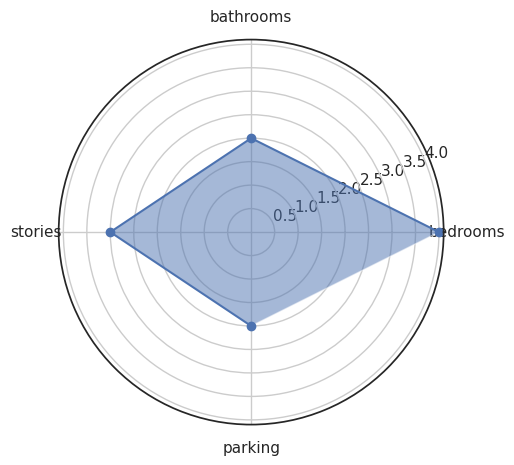

In [115]:
subset_df = df
categories = ['bedrooms', 'bathrooms', 'stories', 'parking']
values = subset_df.loc[0, categories].tolist()

angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()

plt.figure(figsize=(5, 5))
plt.polar(angles, values, marker='o', linestyle='-')
plt.fill(angles, values, alpha=0.5)

plt.thetagrids(np.degrees(angles), labels=categories)
plt.show()
